In [1]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [2]:
train=pd.read_csv('/content/drive/MyDrive/analytic_vidya/train_wn75k28.csv')
test=pd.read_csv('/content/drive/MyDrive/analytic_vidya/test_Wf7sxXF.csv')

In [ ]:
print('traning data dimention',train.shape)
print('testing data dimention',test.shape)

traning data dimention (39161, 19)
testing data dimention (13184, 18)


In [29]:
train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
train['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [3]:
train1=train.drop(['id','created_at','signup_date'], axis = 1)
test1=test.drop(['id','created_at','signup_date'], axis = 1)

In [4]:
train2=train1.drop_duplicates(keep = False)

In [5]:
mean_value=train2['products_purchased'].mean()
train2['products_purchased'].fillna(value=mean_value, inplace=True)
test1['products_purchased'].fillna(value=mean_value, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
train2.describe()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000
mean,6.914075,6.664673,2.193951,0.447930,0.023643,0.222631,0.039650,0.312603,0.518951,0.343146,0.252070,0.040294,0.001380,0.376081,0.002024,0.167893
std,3.850526,3.012635,0.719252,0.551016,0.151941,0.416032,0.195145,0.466740,0.623075,0.486270,0.434856,0.196658,0.037124,0.537026,0.044945,0.373789
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,2.193951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,9.000000,2.193951,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [6]:
#data Normlization
min_max_scaler = preprocessing.MinMaxScaler()
train2[['campaign_var_1','campaign_var_2','products_purchased','user_activity_var_1','user_activity_var_2','user_activity_var_3','user_activity_var_4','user_activity_var_5','user_activity_var_6','user_activity_var_7','user_activity_var_8','user_activity_var_9','user_activity_var_10','user_activity_var_11','user_activity_var_12']] = min_max_scaler.fit_transform(train2[['campaign_var_1','campaign_var_2','products_purchased','user_activity_var_1','user_activity_var_2','user_activity_var_3','user_activity_var_4','user_activity_var_5','user_activity_var_6','user_activity_var_7','user_activity_var_8','user_activity_var_9','user_activity_var_10','user_activity_var_11','user_activity_var_12']])
test1[['campaign_var_1','campaign_var_2','products_purchased','user_activity_var_1','user_activity_var_2','user_activity_var_3','user_activity_var_4','user_activity_var_5','user_activity_var_6','user_activity_var_7','user_activity_var_8','user_activity_var_9','user_activity_var_10','user_activity_var_11','user_activity_var_12']] = min_max_scaler.transform(test1[['campaign_var_1','campaign_var_2','products_purchased','user_activity_var_1','user_activity_var_2','user_activity_var_3','user_activity_var_4','user_activity_var_5','user_activity_var_6','user_activity_var_7','user_activity_var_8','user_activity_var_9','user_activity_var_10','user_activity_var_11','user_activity_var_12']])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [15]:
# Class count
count_class_0, count_class_1 = train2.buy.value_counts()

# Divide by class
df_class_0 = train2[train2['buy'] == 0]
df_class_1 = train2[train2['buy'] == 1]

Random under-sampling:
0    1825
1    1825
Name: buy, dtype: int64


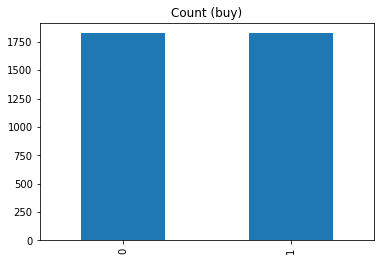

In [16]:
##Under sampling of data 
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_train_under.buy.value_counts())

df_train_under.buy.value_counts().plot(kind='bar', title='Count (buy)');


In [22]:
df_train_under.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
37510,0.133333,0.357143,0.333333,0.000000,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0
21558,0.133333,0.285714,0.333333,0.333333,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0
20720,0.466667,0.714286,0.000000,0.000000,0.0,0.0,0.0,0.5,0.333333,0.5,0.0,0.0,0.0,0.00,0.0,0
37902,0.466667,0.500000,0.397984,0.000000,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0
23971,0.400000,0.285714,0.397984,0.000000,0.0,0.0,0.0,0.5,0.333333,0.0,0.0,0.0,0.0,0.25,0.0,0


Random over-sampling:
0    9045
1    9045
Name: buy, dtype: int64


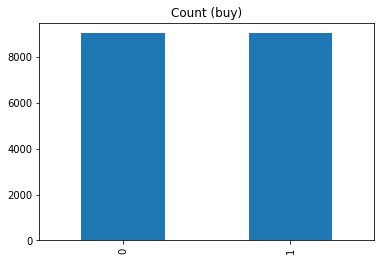

In [23]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over.buy.value_counts())

df_train_over.buy.value_counts().plot(kind='bar', title='Count (buy)');

In [25]:
y=df_train_under['buy']
x=df_train_under.drop(['buy'], 1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [27]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.75%


Confusion matrix:
 [[323  53]
 [ 51 303]]


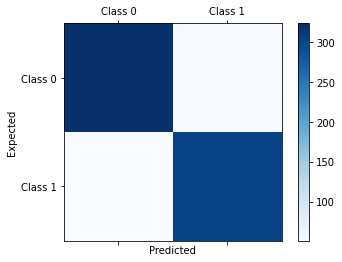

In [28]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
y_pred = model.predict(test1)


In [ ]:
#convert result into csv format
y = pd.DataFrame(y_pred)
y= y.rename(columns = {0:'buy'})
test3 = test.join(y)

test3=test3.drop(['created_at','signup_date','campaign_var_1','campaign_var_2','products_purchased','user_activity_var_1','user_activity_var_2','user_activity_var_3','user_activity_var_4','user_activity_var_5','user_activity_var_6','user_activity_var_7','user_activity_var_8','user_activity_var_9','user_activity_var_10','user_activity_var_11','user_activity_var_12'], 1)
test3.to_csv('/content/drive/MyDrive/analytic_vidya/result1.csv',index = False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
sam=pd.read_csv('/content/drive/MyDrive/analytic_vidya/result1.csv')
sam.head(5)

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0


,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,0.066667,0.071429,0.397984,0.333333,1.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.25,0.0
1,0.200000,0.428571,0.666667,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.0,0.0,0.00,0.0
2,0.466667,0.428571,0.397984,0.000000,0.0,0.0,0.0,0.5,0.333333,0.0,0.0,0.0,0.0,0.00,0.0
3,0.533333,0.500000,0.333333,0.000000,0.0,0.0,0.0,0.5,0.333333,0.5,0.0,0.0,0.0,0.50,0.0
4,0.200000,0.285714,0.333333,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0
